11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/20
938/938 [==============================] - 5s 3ms/step - loss: 0.0706
Epoch 2/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0677
Epoch 3/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0674
Epoch 4/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0671
Epoch 5/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0670
Epoch 6/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0669
Epoch 7/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0668
Epoch 8/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0668
Epoch 9/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0668
Epoch 10/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0667
Epoch 11/20
938/938 [==============================] - 3s 3ms/step - loss: 0.0667
Epoch 12/20
938/938 [=====================

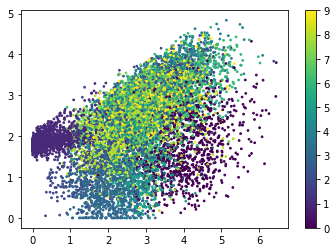

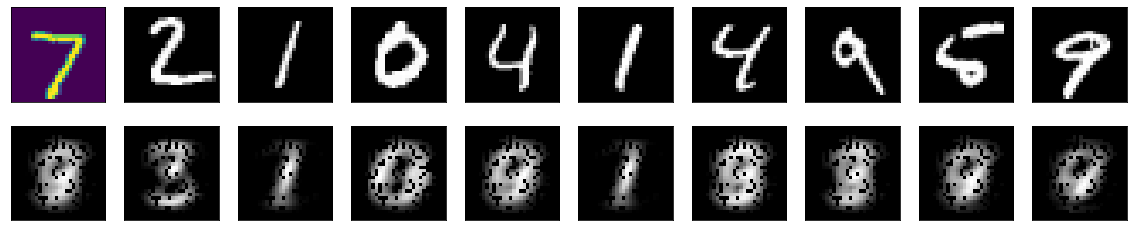

In [1]:

import numpy as np

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

np.random.seed(33)   # random seed，to reproduce results.

ENCODING_DIM_INPUT = 784
ENCODING_DIM_OUTPUT = 2
EPOCHS = 20
BATCH_SIZE = 64

def train(x_train):
    """
    build autoencoder.
    :param x_train:  the train data
    :return: encoder and decoder
    """
    # input placeholder
    input_image = Input(shape=(ENCODING_DIM_INPUT, ))

    # encoding layer
    hidden_layer = Dense(ENCODING_DIM_OUTPUT, activation='relu')(input_image)
    # decoding layer
    decode_output = Dense(ENCODING_DIM_INPUT, activation='relu')(hidden_layer)

    # build autoencoder, encoder, decoder
    autoencoder = Model(inputs=input_image, outputs=decode_output)
    encoder = Model(inputs=input_image, outputs=hidden_layer)

    # compile autoencoder
    autoencoder.compile(optimizer='adam', loss='mse')

    # training
    autoencoder.fit(x_train, x_train, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True)

    return encoder, autoencoder

def plot_representation(encode_images, y_test):
    """
    plot the hidden result.
    :param encode_images: the images after encoding
    :param y_test: the label.
    :return:
    """
    # test and plot
    plt.scatter(encode_images[:, 0], encode_images[:, 1], c=y_test, s=3)
    plt.colorbar()
    plt.show()

def show_images(decode_images, x_test):
    """
    plot the images.
    :param decode_images: the images after decoding
    :param x_test: testing data
    :return:
    """
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        ax.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        ax.imshow(decode_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

if __name__ == '__main__':
    # Step1： load data  x_train: (60000, 28, 28), y_train: (60000,) x_test: (10000, 28, 28), y_test: (10000,)
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Step2: normalize
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    # Step3: reshape data, x_train: (60000, 784), x_test: (10000, 784), one row denotes one sample.
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))

    # Step4： train
    encoder, autoencoder = train(x_train=x_train)

    # test and plot
    encode_images = encoder.predict(x_test)
    plot_representation(encode_images, y_test)

    # show images
    decode_images = autoencoder.predict(x_test)
    show_images(decode_images, x_test)


